# Feature Engineering Project
- imports

In [1]:
# !pip install tqdm

In [2]:
import numpy as np
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

- Data Reading

In [3]:
def read_and_combine(folder: str = "training"):
    
    # Path to the folder containing CSV files
    folder_path = "../data/" + folder
    # List to store DataFrames from each CSV file
    dataFrames = []
    # Loop through all files in the folder
    for filename in tqdm(os.listdir(folder_path)):
        if filename.endswith('.csv'):
            file_path = os.path.join(folder_path, filename)
            # Read each CSV file into a DataFrame and append to the list
            dataframe = pd.read_csv(file_path)
            dataFrames.append(dataframe)
    # Combine all DataFrames into one
    combined_dataframe = pd.concat(dataFrames, ignore_index=True)
    # Save the combined DataFrame to a new CSV file
    combined_dataframe.to_csv('combined_output.csv', index=False)
    # Display the combined DataFrame
    return combined_dataframe

In [4]:
training_data = read_and_combine()
training_data.shape

100%|██████████| 185/185 [00:02<00:00, 90.91it/s]


(672744, 25)

In [5]:
validation_data = read_and_combine("validation")
validation_data.shape

100%|██████████| 185/185 [00:00<00:00, 227.98it/s]


(144148, 25)

In [6]:
test_data = read_and_combine("test")
test_data.shape

100%|██████████| 185/185 [00:00<00:00, 218.31it/s]


(156262, 25)

In [7]:
training_data.dtypes

MACHINE_ID                       object
MACHINE_DATA                     object
TIMESTAMP                       float64
WAFER_ID                         object
STAGE                            object
CHAMBER                         float64
USAGE_OF_BACKING_FILM           float64
USAGE_OF_DRESSER                float64
USAGE_OF_POLISHING_TABLE        float64
USAGE_OF_DRESSER_TABLE          float64
PRESSURIZED_CHAMBER_PRESSURE    float64
MAIN_OUTER_AIR_BAG_PRESSURE     float64
CENTER_AIR_BAG_PRESSURE         float64
RETAINER_RING_PRESSURE          float64
RIPPLE_AIR_BAG_PRESSURE         float64
USAGE_OF_MEMBRANE               float64
USAGE_OF_PRESSURIZED_SHEET      float64
SLURRY_FLOW_LINE_A              float64
SLURRY_FLOW_LINE_B              float64
SLURRY_FLOW_LINE_C              float64
WAFER_ROTATION                  float64
STAGE_ROTATION                  float64
HEAD_ROTATION                   float64
DRESSING_WATER_STATUS           float64
EDGE_AIR_BAG_PRESSURE           float64


In [8]:
training_data.describe()

,TIMESTAMP,CHAMBER,USAGE_OF_BACKING_FILM,USAGE_OF_DRESSER,USAGE_OF_POLISHING_TABLE,USAGE_OF_DRESSER_TABLE,PRESSURIZED_CHAMBER_PRESSURE,MAIN_OUTER_AIR_BAG_PRESSURE,CENTER_AIR_BAG_PRESSURE,RETAINER_RING_PRESSURE,...,USAGE_OF_MEMBRANE,USAGE_OF_PRESSURIZED_SHEET,SLURRY_FLOW_LINE_A,SLURRY_FLOW_LINE_B,SLURRY_FLOW_LINE_C,WAFER_ROTATION,STAGE_ROTATION,HEAD_ROTATION,DRESSING_WATER_STATUS,EDGE_AIR_BAG_PRESSURE
count,6.727440e+05,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,...,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000
mean,4.844186e+08,4.223673,4968.532485,396.444964,171.983843,3496.348712,49.973427,155.327976,40.147023,1218.777316,...,58.915409,1490.559854,4.245952,0.725417,249.354458,12.802433,52.437560,159.792734,0.424763,28.531700
std,1.639134e+06,1.333534,2888.628864,219.524524,94.623563,479.742809,39.241073,133.191797,34.240954,1499.216737,...,34.252516,866.588654,6.683546,0.420575,214.034647,16.325427,91.878220,8.889108,0.494307,24.346485
min,4.816344e+08,1.000000,19.166667,5.185185,0.000000,2664.750000,0.000000,0.000000,0.000000,0.000000,...,0.227273,5.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.827736e+08,4.000000,2425.000000,205.185185,88.888889,3041.000000,0.000000,0.000000,0.000000,0.000000,...,28.754941,727.500000,2.222222,0.909091,0.000000,0.000000,0.000000,156.800000,0.000000,0.000000
50%,4.846534e+08,4.000000,5036.666667,395.925926,172.592593,3544.750000,72.857143,252.000000,61.250000,1446.900000,...,59.723320,1511.000000,2.222222,0.909091,411.600000,0.000000,0.000000,160.000000,0.000000,43.939394
75%,4.857991e+08,5.000000,7322.500000,590.370370,254.074074,3912.000000,77.142857,268.800000,66.250000,1454.700000,...,86.828063,2196.750000,2.222222,0.909091,439.600000,34.651163,65.526316,160.000000,1.000000,48.484848
max,4.872682e+08,6.000000,10532.500000,771.851852,357.037037,4305.500000,189.047619,499.200000,139.375000,10662.600000,...,124.891304,3159.750000,42.638889,12.500000,1083.600000,34.883721,263.552632,192.000000,1.000000,141.515152


- Feature Extraction

In [9]:
def extract_features(data: pd.DataFrame,
                    id_column: str = "WAFER_ID",
                    non_extracted_columns: list = ["TIMESTAMP", "WAFER_ID", "CHAMBER"]):
    
    unique_ids = data[id_column].unique()
    
    data_rows = []
    for wafer in tqdm(unique_ids):
        wafer_data = data[data["WAFER_ID"]==wafer]
        # Iterate through each numerical column and calculate the features using numpy
        features_np = {}
        for column in wafer_data.select_dtypes(include='number').columns:
            if column in non_extracted_columns:
                continue
            col_data = wafer_data[column].values  # Convert the column to a numpy array
            features_np.update({
                f'{column}_Mean': np.mean(col_data),
                f'{column}_Median': np.median(col_data),
                f'{column}_StdDev': np.std(col_data, ddof=1),  # ddof=1 for sample standard deviation
                f'{column}_Variance': np.var(col_data, ddof=1),  # ddof=1 for sample variance
                f'{column}_Minimum': np.min(col_data),
                f'{column}_Maximum': np.max(col_data),
                f'{column}_Range': np.ptp(col_data),  # Peak-to-peak is a simpler way to compute range
                f'{column}_Skewness': pd.Series(col_data).skew(),  # Using pandas for skew as numpy does not have a direct function
                f'{column}_Kurtosis': pd.Series(col_data).kurt(),  # Using pandas for kurtosis as numpy does not have a direct function
                f'{column}_25thPercentile': np.percentile(col_data, 25),
                f'{column}_50thPercentile': np.percentile(col_data, 50),
                f'{column}_75thPercentile': np.percentile(col_data, 75)
            })
        # Convert the features dictionary to a DataFrame
        # Since we want all features in one row, we use pd.DataFrame and specify the index [0]
        feature_df = pd.DataFrame([features_np])
        feature_df.insert(0, "WAFER_ID", wafer)
        feature_df.insert(1, "STAGE", np.unique(wafer_data["STAGE"])[0])
        feature_df.insert(2, "CHAMBER", np.unique(wafer_data["CHAMBER"])[0])

        data_rows.append(feature_df)
    extracted_data = pd.concat(data_rows)
    return extracted_data

In [10]:
training_set = extract_features(training_data)
training_set.dtypes

  0%|          | 0/1699 [00:00<?, ?it/s]

100%|██████████| 1699/1699 [01:22<00:00, 20.50it/s]


WAFER_ID                                  int64
STAGE                                    object
CHAMBER                                 float64
USAGE_OF_BACKING_FILM_Mean              float64
USAGE_OF_BACKING_FILM_Median            float64
                                         ...   
EDGE_AIR_BAG_PRESSURE_Skewness          float64
EDGE_AIR_BAG_PRESSURE_Kurtosis          float64
EDGE_AIR_BAG_PRESSURE_25thPercentile    float64
EDGE_AIR_BAG_PRESSURE_50thPercentile    float64
EDGE_AIR_BAG_PRESSURE_75thPercentile    float64
Length: 231, dtype: object

In [11]:
validation_set = extract_features(validation_data)
validation_set.dtypes

100%|██████████| 416/416 [00:10<00:00, 41.15it/s]


WAFER_ID                                  int64
STAGE                                    object
CHAMBER                                 float64
USAGE_OF_BACKING_FILM_Mean              float64
USAGE_OF_BACKING_FILM_Median            float64
                                         ...   
EDGE_AIR_BAG_PRESSURE_Skewness          float64
EDGE_AIR_BAG_PRESSURE_Kurtosis          float64
EDGE_AIR_BAG_PRESSURE_25thPercentile    float64
EDGE_AIR_BAG_PRESSURE_50thPercentile    float64
EDGE_AIR_BAG_PRESSURE_75thPercentile    float64
Length: 231, dtype: object

In [12]:
test_set = extract_features(test_data)
test_data.dtypes

100%|██████████| 415/415 [00:10<00:00, 39.48it/s]


MACHINE_ID                       object
MACHINE_DATA                     object
TIMESTAMP                       float64
WAFER_ID                         object
STAGE                            object
CHAMBER                         float64
USAGE_OF_BACKING_FILM           float64
USAGE_OF_DRESSER                float64
USAGE_OF_POLISHING_TABLE        float64
USAGE_OF_DRESSER_TABLE          float64
PRESSURIZED_CHAMBER_PRESSURE    float64
MAIN_OUTER_AIR_BAG_PRESSURE     float64
CENTER_AIR_BAG_PRESSURE         float64
RETAINER_RING_PRESSURE          float64
RIPPLE_AIR_BAG_PRESSURE         float64
USAGE_OF_MEMBRANE               float64
USAGE_OF_PRESSURIZED_SHEET      float64
SLURRY_FLOW_LINE_A              float64
SLURRY_FLOW_LINE_B              float64
SLURRY_FLOW_LINE_C              float64
WAFER_ROTATION                  float64
STAGE_ROTATION                  float64
HEAD_ROTATION                   float64
DRESSING_WATER_STATUS           float64
EDGE_AIR_BAG_PRESSURE           float64


In [13]:
del training_data, validation_data, test_data

- Add the output column to the sets

In [14]:
def add_output_column(data: pd.DataFrame(),
                      data_name: str = "training"):
    output_data = pd.read_csv("../data/CMP-" + data_name + "-removalrate.csv")
    data = pd.merge(data, output_data, on=['WAFER_ID', 'STAGE'])
    return data   

In [15]:
training_set = add_output_column(training_set)

In [16]:
training_set['STAGE'] = training_set['STAGE'].replace({'A': 0, 'B': 1})
training_set.head()

,WAFER_ID,STAGE,CHAMBER,USAGE_OF_BACKING_FILM_Mean,USAGE_OF_BACKING_FILM_Median,USAGE_OF_BACKING_FILM_StdDev,USAGE_OF_BACKING_FILM_Variance,USAGE_OF_BACKING_FILM_Minimum,USAGE_OF_BACKING_FILM_Maximum,USAGE_OF_BACKING_FILM_Range,...,EDGE_AIR_BAG_PRESSURE_Variance,EDGE_AIR_BAG_PRESSURE_Minimum,EDGE_AIR_BAG_PRESSURE_Maximum,EDGE_AIR_BAG_PRESSURE_Range,EDGE_AIR_BAG_PRESSURE_Skewness,EDGE_AIR_BAG_PRESSURE_Kurtosis,EDGE_AIR_BAG_PRESSURE_25thPercentile,EDGE_AIR_BAG_PRESSURE_50thPercentile,EDGE_AIR_BAG_PRESSURE_75thPercentile,AVG_REMOVAL_RATE
0,371447024,0,1.0,9307.651515,9307.500000,3.083687e+00,9.509126e+00,9302.500000,9313.333333,10.833333,...,381.541027,0.0,60.909091,60.909091,-2.039952,2.612346,48.787879,60.606061,60.909091,149.13090
1,371447028,0,1.0,9356.666667,9356.666667,1.822178e-12,3.320332e-24,9356.666667,9356.666667,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.04915
2,371447036,0,1.0,9356.666667,9356.666667,1.822294e-12,3.320754e-24,9356.666667,9356.666667,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,151.70175
3,-4113511818,0,4.0,9624.115882,9972.500000,3.598210e+02,1.294712e+05,9253.333333,9985.833333,732.500000,...,334.830661,0.0,57.878788,57.878788,-1.512967,0.648421,43.939394,44.242424,48.484848,65.02230
4,-4113511780,0,4.0,9266.260623,9266.666667,3.802814e+00,1.446140e+01,9260.000000,9272.500000,12.500000,...,778.262958,0.0,106.363636,106.363636,-0.517512,-0.588680,33.030303,48.787879,69.696970,61.04565


In [17]:
test_set = add_output_column(test_set,
                             data_name="test")

In [18]:
test_set['STAGE'] = test_set['STAGE'].replace({'A': 0, 'B': 1})
test_set.head()

,WAFER_ID,STAGE,CHAMBER,USAGE_OF_BACKING_FILM_Mean,USAGE_OF_BACKING_FILM_Median,USAGE_OF_BACKING_FILM_StdDev,USAGE_OF_BACKING_FILM_Variance,USAGE_OF_BACKING_FILM_Minimum,USAGE_OF_BACKING_FILM_Maximum,USAGE_OF_BACKING_FILM_Range,...,EDGE_AIR_BAG_PRESSURE_Variance,EDGE_AIR_BAG_PRESSURE_Minimum,EDGE_AIR_BAG_PRESSURE_Maximum,EDGE_AIR_BAG_PRESSURE_Range,EDGE_AIR_BAG_PRESSURE_Skewness,EDGE_AIR_BAG_PRESSURE_Kurtosis,EDGE_AIR_BAG_PRESSURE_25thPercentile,EDGE_AIR_BAG_PRESSURE_50thPercentile,EDGE_AIR_BAG_PRESSURE_75thPercentile,AVG_REMOVAL_RATE
0,373446766,0,1.0,9356.666667,9356.666667,3.644469e-12,1.328216e-23,9356.666667,9356.666667,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,153.2610
1,-4224160592,0,4.0,9332.545761,9332.916667,3.690949e+00,1.362310e+01,9326.666667,9339.166667,12.500000,...,354.062453,0.0,57.878788,57.878788,-1.393967,0.326083,43.939394,44.242424,48.787879,56.1786
2,-887170152,1,4.0,9424.735180,9425.000000,3.707760e+00,1.374749e+01,9418.333333,9430.833333,12.500000,...,721.145318,0.0,106.363636,106.363636,-0.394427,-0.454105,43.939394,44.242424,69.696970,64.3881
3,-4224160678,1,4.0,9526.132959,9526.666667,3.834909e+00,1.470653e+01,9520.000000,9533.333333,13.333333,...,337.359492,0.0,57.878788,57.878788,-1.507054,0.669936,43.939394,44.242424,48.787879,66.9813
4,-4224160686,0,4.0,9614.945238,9615.000000,3.747940e+00,1.404706e+01,9609.166667,9621.666667,12.500000,...,362.786997,0.0,57.878788,57.878788,-1.532967,0.580493,48.484848,48.787879,48.787879,57.2523


In [19]:
training_set.to_csv('training_set.csv', index=False)
test_set.to_csv('test_set.csv', index=False)

In [20]:
training_set.shape

(1699, 232)

## To be done
- Create a first model using RandomForests, SVR, and Lasso.
- Rebuild the same model using only the highest ranking features according to RandomForests. What do you notice in the performance?
- Use the ReliefF to select the best feature from the original dataset (*training_set*)
- Rebuild the models using the features selected by the ReliefF.
- What are your conclusions?

## Outlier Removal

In [21]:
from sklearn.ensemble import IsolationForest

def remove_outliers(dataset, column_name):
    # Use Isolation Forest for outlier removal on the specified column
    clf = IsolationForest(contamination=0.0001)
    clf.fit(dataset[[column_name]])
    outliers = clf.predict(dataset[[column_name]])

    # Remove data points identified as outliers
    dataset = dataset[outliers == 1]

    return dataset

# Specify the column for outlier removal
column_to_remove_outliers = 'AVG_REMOVAL_RATE'

# Apply outlier removal to training set for the specified column
training_set = remove_outliers(training_set, column_to_remove_outliers)

# # Apply outlier removal to testing set for the specified column
# testing_set = remove_outliers(test_set, column_to_remove_outliers)

# # Apply outlier removal to validation set for the specified column
# validation_set = remove_outliers(validation_set, column_to_remove_outliers)


In [22]:
training_set.shape

(1698, 232)

# First modeling trials
- Creating the inputs and outputs (*I leuuuuuuve numpy*)

In [23]:
def create_inputs_outputs(data_set):
    inputs = data_set.drop(columns=['WAFER_ID', 'AVG_REMOVAL_RATE']).values
    outputs = data_set['AVG_REMOVAL_RATE'].values
    return inputs, outputs

# Create training inputs and outputs
training_inputs, training_outputs = create_inputs_outputs(training_set)

# Create test inputs and outputs
test_inputs, test_outputs = create_inputs_outputs(test_set)


- Scaling the data

In [24]:
# Initialize MinMaxScaler instances for input and output features
inputs_scaler = MinMaxScaler()
outputs_scaler = MinMaxScaler()

# Fit the scaler to the training inputs and then transform both training and test inputs
scaled_training_inputs = inputs_scaler.fit_transform(training_inputs)
scaled_test_inputs = inputs_scaler.transform(test_inputs)

# Fit the scaler to the training outputs and transform both training and test outputs
# Note: Reshape (-1, 1) is necessary as fit_transform expects 2D inputs and outputs are typically 1D
scaled_training_outputs = outputs_scaler.fit_transform(training_outputs.reshape(-1, 1)).flatten()
scaled_test_outputs = outputs_scaler.transform(test_outputs.reshape(-1, 1)).flatten()


- First models using RandomForests, SVR, and Lasso.

In [25]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Assuming outputs_scaler and scaled_test_outputs are already defined from previous steps

# Inverse transform the scaled test outputs to get back to the original scale
test_outputs_inv = outputs_scaler.inverse_transform(scaled_test_outputs.reshape(-1, 1)).flatten()

# Initialize dictionaries for models, predictions, metrics, and errors
models = {
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'Lasso': Lasso()
}
predictions = {}
predictions_inv = {}
metrics = {}
absolute_errors = {}
relative_errors = {}

# Function to calculate metrics
def calculate_metrics(true_values, predictions_inv):
    errors = predictions_inv - true_values
    relative_errors = errors / np.maximum(np.abs(true_values), 1e-8)
    mae = mean_absolute_error(true_values, predictions_inv)
    mape = mean_absolute_percentage_error(true_values, predictions_inv)
    mse = mean_squared_error(true_values, predictions_inv)
    r2 = r2_score(true_values, predictions_inv)
    return {
        'Mean of Error': np.mean(errors),
        'Std of Error': np.std(errors),
        'Max of Error': np.max(errors),
        'MAE': mae,
        'Mean Absolute Percentage Error': mape,
        'Max Absolute Percentage Error': np.max(np.abs(relative_errors)),
        'MSE': mse,
        'SSE': np.sum(np.square(errors)),
        'R2 Score': r2,
        'Mean of Relative Error': np.mean(relative_errors),
        'Std of Relative Error': np.std(relative_errors),
        'Max of Relative Error': np.max(relative_errors)
    }

# Loop through each model to fit, predict, and calculate metrics
for name, model in models.items():
    # Fit model
    model.fit(scaled_training_inputs, scaled_training_outputs)
    # Predict on test data
    predictions[name] = model.predict(scaled_test_inputs)
    # Inverse transform predictions to original scale
    predictions_inv[name] = outputs_scaler.inverse_transform(predictions[name].reshape(-1, 1)).flatten()
    # Calculate and store absolute errors
    absolute_errors[name] = predictions_inv[name] - test_outputs_inv
    # Calculate and store relative errors
    relative_errors[name] = absolute_errors[name] / np.maximum(np.abs(test_outputs_inv), 1e-8)
    # Calculate and store metrics, including errors and relative errors
    metrics[name] = calculate_metrics(test_outputs_inv, predictions_inv[name])

# Convert the metrics dictionary to a pandas DataFrame for display
results_df = pd.DataFrame(metrics).T

# Display or use results_df as needed
results_df

,Mean of Error,Std of Error,Max of Error,MAE,Mean Absolute Percentage Error,Max Absolute Percentage Error,MSE,SSE,R2 Score,Mean of Relative Error,Std of Relative Error,Max of Relative Error
Random Forest,4.366407,57.842456,1140.530106,7.047940,0.087183,15.696841,3364.815212,1.396398e+06,-2.780383,0.057731,0.784891,15.696841
SVR,59.267949,128.893765,551.476935,105.249075,1.245431,6.729458,20126.292487,8.352411e+06,-21.611968,0.709196,1.547819,6.729458
Lasso,9.170746,29.834084,44.769748,27.797775,0.316228,0.821426,974.175164,4.042827e+05,-0.094490,0.193999,0.287559,0.821426


- Error Analysis

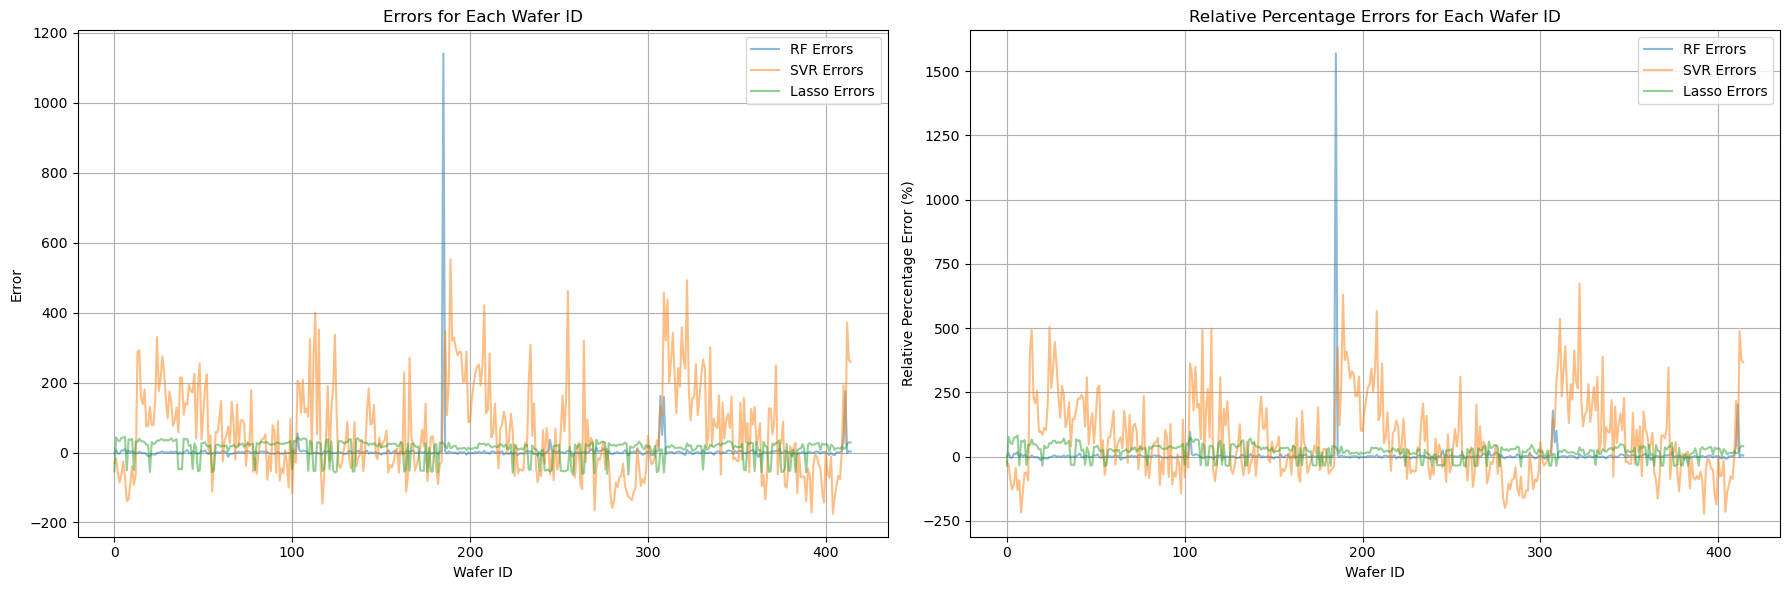

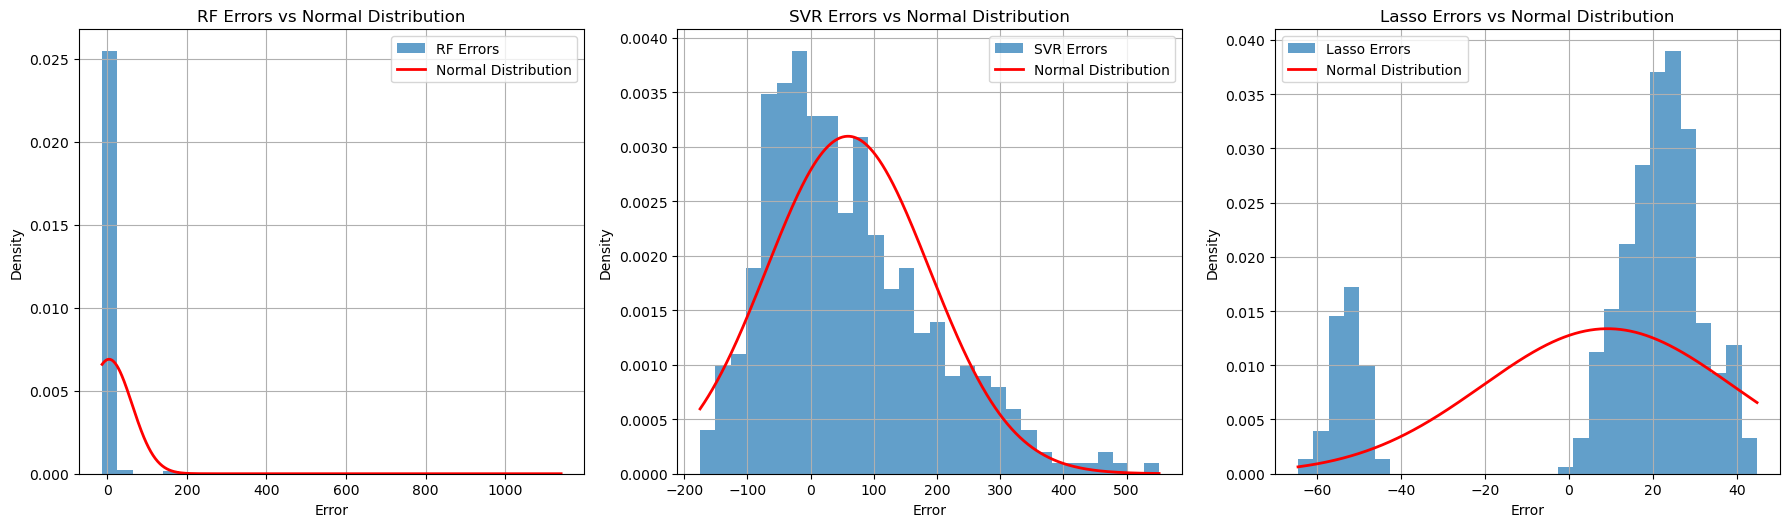

{'RF Errors': KstestResult(statistic=0.4506024096385542, pvalue=2.534868326397548e-38, statistic_location=9.340632000000014, statistic_sign=1),
 'SVR Errors': KstestResult(statistic=0.08674698795180723, pvalue=0.08803854706381384, statistic_location=61.12921362831791, statistic_sign=1),
 'Lasso Errors': KstestResult(statistic=0.2891566265060241, pvalue=1.0792609305460274e-15, statistic_location=9.946933920113395, statistic_sign=-1)}

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp, norm

# Adjusted to use absolute_errors dictionary
absolute_errors = {
    'RF Errors': absolute_errors['Random Forest'],
    'SVR Errors': absolute_errors['SVR'],
    'Lasso Errors': absolute_errors['Lasso']
}

# Initialize figure for error plots
plt.figure(figsize=(18, 6))

# Plot errors for each model
for label, errors in absolute_errors.items():
    plt.subplot(1, 2, 1)
    plt.plot(errors, alpha=0.5, label=label)
plt.title('Errors for Each Wafer ID')
plt.xlabel('Wafer ID')
plt.ylabel('Error')
plt.legend()
plt.grid()

# Plot relative percentage errors for each model
plt.subplot(1, 2, 2)
for label, errors in absolute_errors.items():
    relative_errors = errors / np.maximum(np.abs(test_outputs_inv), 1e-8) * 100
    plt.plot(relative_errors, alpha=0.5, label=label)
plt.title('Relative Percentage Errors for Each Wafer ID')
plt.xlabel('Wafer ID')
plt.ylabel('Relative Percentage Error (%)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Calculate mean, std, and normal distribution for each model's errors
plt.figure(figsize=(18, 15))
for i, (label, errors) in enumerate(absolute_errors.items(), start=1):
    mean_error, std_error = np.mean(errors), np.std(errors)
    # Calculate min and max for the current model's errors to define x_values
    x_min = np.min(errors)
    x_max = np.max(errors)
    x_values = np.linspace(x_min, x_max, 1000)
    
    normal_distribution = norm.pdf(x_values, mean_error, std_error)
    
    # Plot histograms with normal distribution curve
    plt.subplot(3, 3, i)
    plt.hist(errors, bins=30, alpha=0.7, density=True, label=f'{label}')
    plt.plot(x_values, normal_distribution, 'r-', label='Normal Distribution', linewidth=2)
    plt.title(f'{label} vs Normal Distribution')
    plt.xlabel('Error')
    plt.ylabel('Density')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

# Perform KS-test
ks_tests = {}
for label, errors in absolute_errors.items():
    mean_error, std_error = np.mean(errors), np.std(errors)
    ks_tests[label] = ks_2samp(errors, np.random.normal(mean_error, std_error, size=len(errors)))

# Display KS-test results
ks_tests


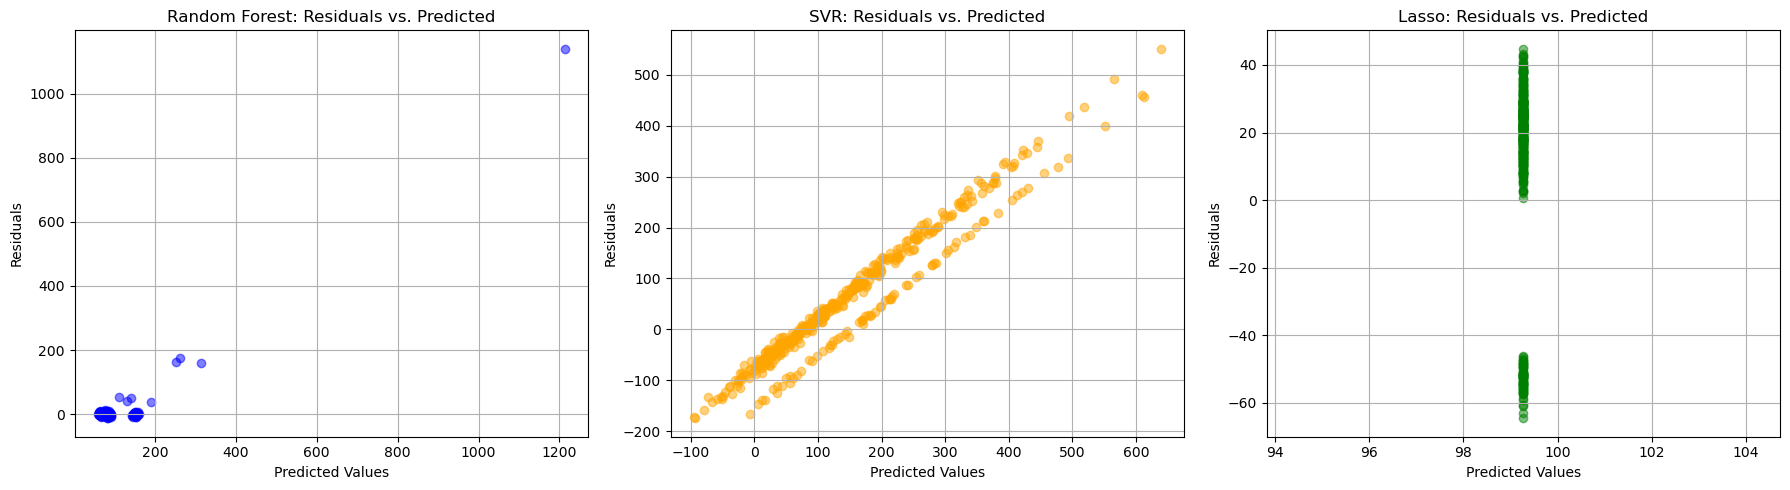

RF Errors White Test: (415.0, 0.47691782172510144, nan, nan)
SVR Errors White Test: (415.0, 0.47691782172510144, nan, nan)
Lasso Errors White Test: (415.0, 0.47691782172510144, nan, nan)


In [27]:
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm
import matplotlib.pyplot as plt

absolute_errors_corrected = {
    'Random Forest': absolute_errors['RF Errors'],
    'SVR': absolute_errors['SVR Errors'],
    'Lasso': absolute_errors['Lasso Errors']
}

# Assuming predictions_inv and absolute_errors dictionaries are correctly populated as before
predictions_inv = {
    'Random Forest': predictions_inv['Random Forest'],
    'SVR': predictions_inv['SVR'],
    'Lasso': predictions_inv['Lasso']
}

# Adjust model_colors to match your actual model names in absolute_errors
model_colors = {
    'Random Forest': 'blue',
    'SVR': 'orange',
    'Lasso': 'green'
}

# Ensure the keys are consistent across dictionaries
plt.figure(figsize=(18, 5))

# Plotting residuals vs. predicted values for each model
for model_name in absolute_errors_corrected.keys():
    plt.subplot(1, 3, list(absolute_errors_corrected.keys()).index(model_name) + 1)
    plt.scatter(predictions_inv[model_name], absolute_errors_corrected[model_name], alpha=0.5, color=model_colors[model_name])
    plt.title(f'{model_name}: Residuals vs. Predicted')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.grid()
    # else:
    #     print(f"Skipping {model_name} due to missing data")

plt.tight_layout()
plt.show()

# Prepare X for the White test with a constant
X = sm.add_constant(scaled_test_inputs)  # X represents the predictor variables with a constant added

# Conducting the White test for Heteroscedasticity
white_test_results = {}
for model_name, errors in absolute_errors.items():
    white_test_results[model_name] = het_white(errors, X)

# Display the White test results
for model_name, result in white_test_results.items():
    print(f'{model_name} White Test:', result)

In [28]:
# !pip install statsmodels

- Rank the features

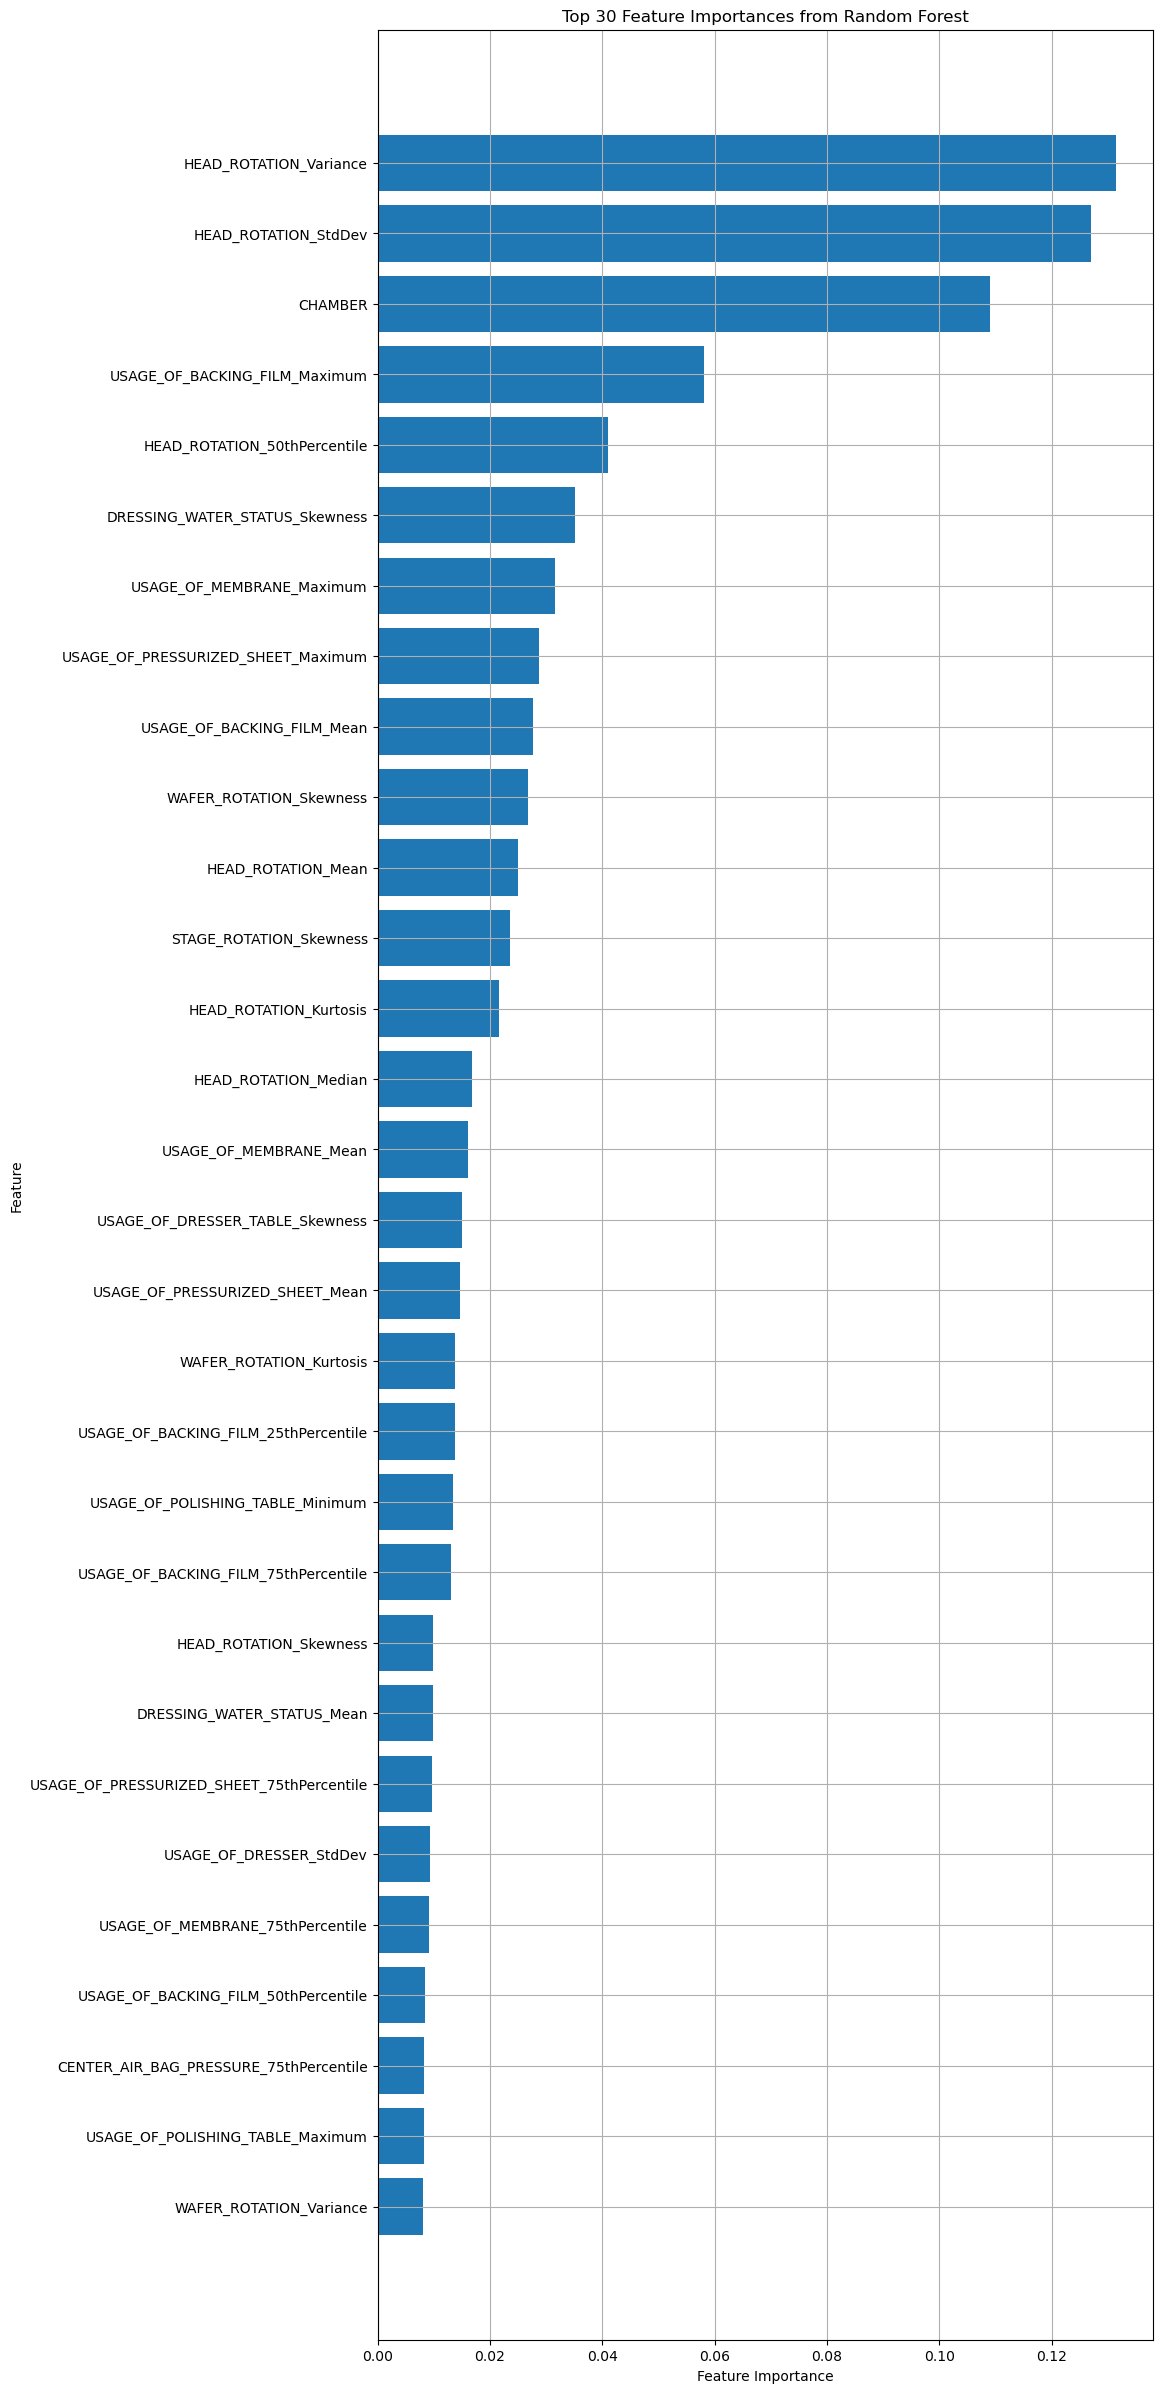

In [29]:
# Extract feature importances from the Random Forest model and pair them with column names
feature_importances_rf = models['Random Forest'].feature_importances_
feature_names = training_set.drop(columns=['WAFER_ID', 'AVG_REMOVAL_RATE']).columns

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_rf})

# Sort the DataFrame based on feature importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
# plt.figure(figsize=(10, 8))
# plt.barh(feature_importances_df['Feature'][:30], feature_importances_df['Importance'][:30])
plt.figure(figsize=(10, 30))
plt.barh(feature_importances_df['Feature'][:30], feature_importances_df['Importance'][:30])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 30 Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.grid()
plt.show()

- The new models

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np
import pandas as pd

# Assuming 'feature_importances_df' is already defined and contains the feature importances

# Select the top 20 features based on their importance
top_20_features = feature_importances_df['Feature'][:20].values

# Initialize a MinMaxScaler for inputs
inputs_scaler = MinMaxScaler()

# Scale the training and test sets for the top 20 features only
scaled_training_inputs_top20 = inputs_scaler.fit_transform(training_set[top_20_features])
scaled_test_inputs_top20 = inputs_scaler.transform(test_set[top_20_features])

# Define and fit models on the training data with only the top 20 features
models_top20 = {
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'Lasso': Lasso()
}

# Store predictions and errors in dictionaries for easy access and manipulation
predictions_top20 = {}
errors_top20 = {}
metrics_top20 = {}

for name, model in models_top20.items():
    # Fit the model
    model.fit(scaled_training_inputs_top20, scaled_training_outputs)
    
    # Predict on the test data
    predictions_top20[name] = model.predict(scaled_test_inputs_top20)
    
    # Inverse transform the predictions to original scale
    predictions_inv = outputs_scaler.inverse_transform(predictions_top20[name].reshape(-1, 1)).flatten()
    
    # Calculate errors
    errors_top20[name] = predictions_inv - test_outputs_inv
    
    # Calculate and store various metrics
    metrics_top20[name] = {
        'Mean of Error': np.mean(errors_top20[name]),
        'Std of Error': np.std(errors_top20[name]),
        'Max of Error': np.max(errors_top20[name]),
        'MAE': mean_absolute_error(test_outputs_inv, predictions_inv),
        'Mean Absolute Percentage Error': mean_absolute_percentage_error(test_outputs_inv, predictions_inv),
        'Max Absolute Percentage Error': np.max(np.abs(errors_top20[name] / np.maximum(test_outputs_inv, 1e-8))),
        'MSE': mean_squared_error(test_outputs_inv, predictions_inv),
        'SSE': np.sum(np.square(errors_top20[name])),
        'R': np.corrcoef(test_outputs_inv, predictions_inv)[0, 1],
        'R2 Score': r2_score(test_outputs_inv, predictions_inv)
    }

# Convert the metrics dictionary to a pandas DataFrame for display
results_top20_df = pd.DataFrame(metrics_top20).T

results_top20_df


,Mean of Error,Std of Error,Max of Error,MAE,Mean Absolute Percentage Error,Max Absolute Percentage Error,MSE,SSE,R,R2 Score
Random Forest,2.683348,33.534658,596.935335,8.220663,0.101395,8.215477,1131.773652,4.696861e+05,6.457711e-01,-0.271552
SVR,259.136621,56.975292,443.947720,259.136621,3.219671,6.882437,70397.971974,2.921516e+07,-1.485128e-01,-78.092394
Lasso,9.170746,29.834084,44.769748,27.797775,0.316228,0.821426,974.175164,4.042827e+05,5.279797e-17,-0.094490


- Error Analysis

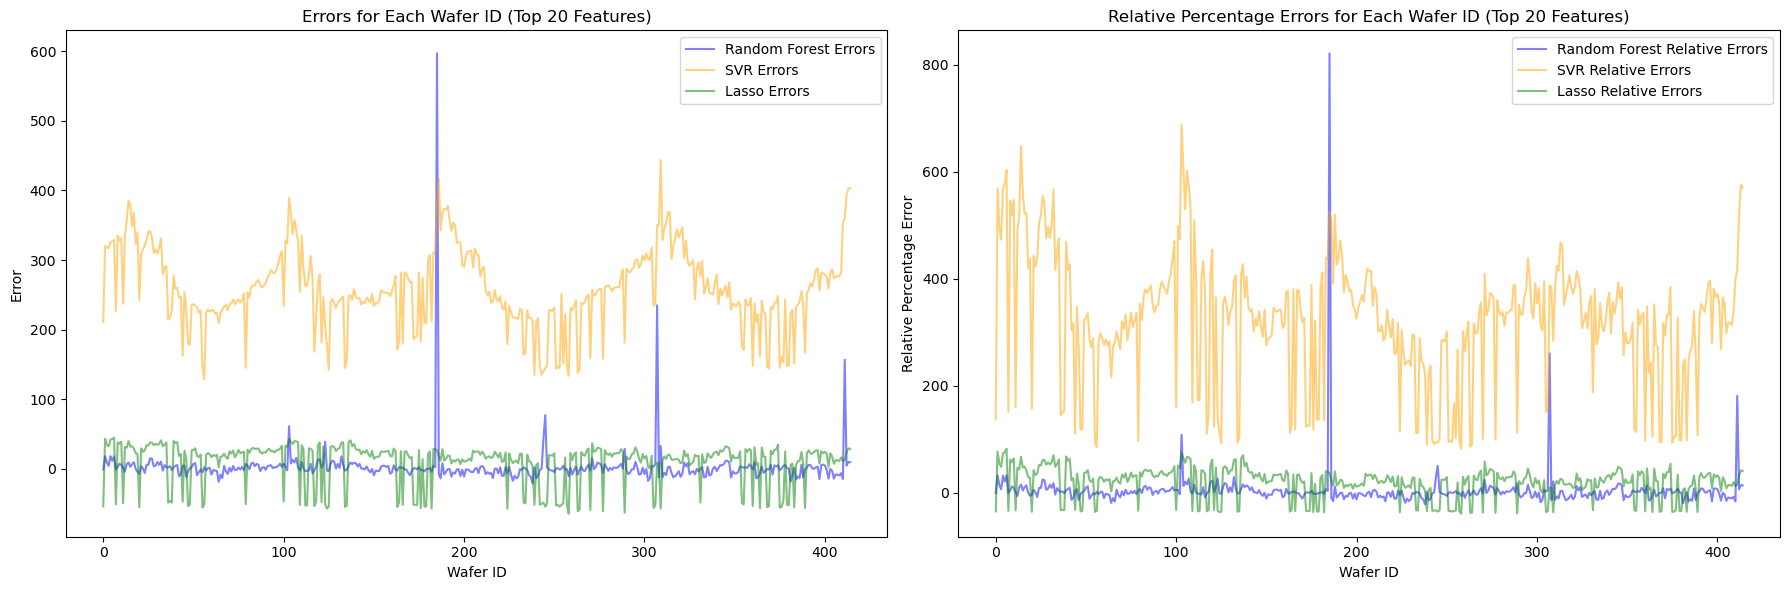

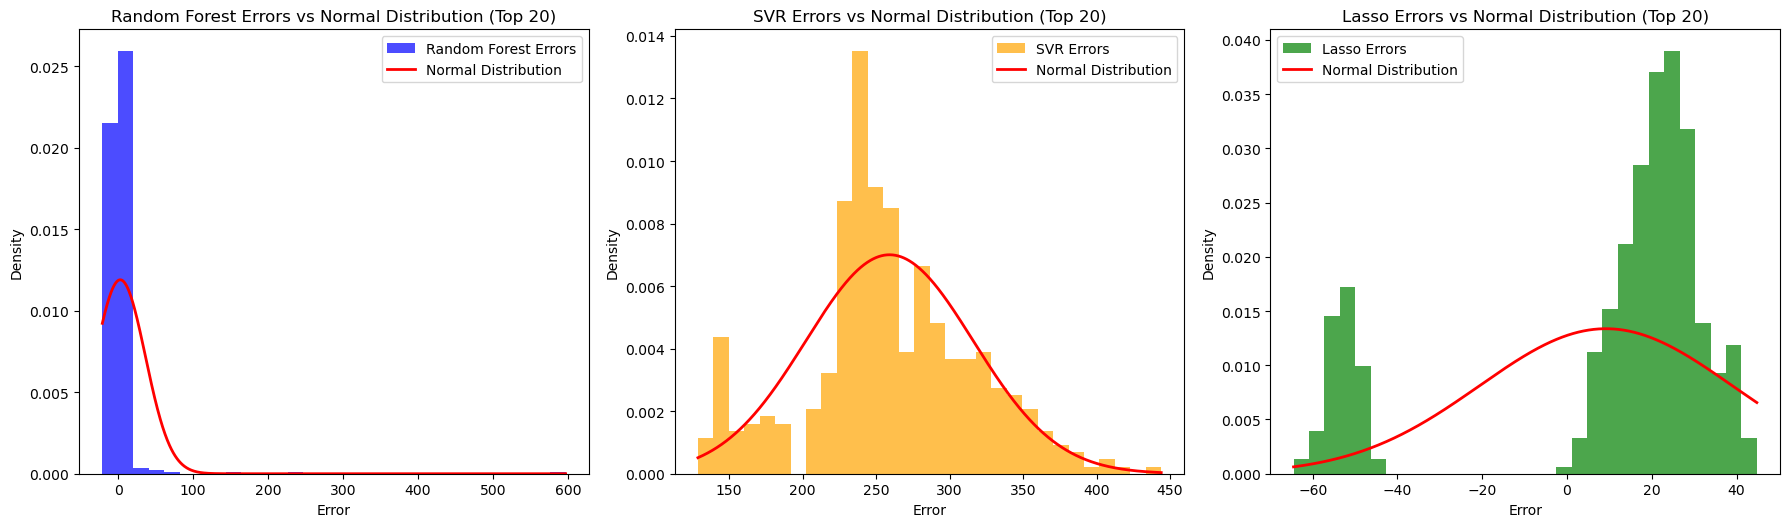

Random Forest KS-test vs Normal: KstestResult(statistic=0.2963855421686747, pvalue=1.7710958747216653e-16, statistic_location=10.323602999999999, statistic_sign=1)
SVR KS-test vs Normal: KstestResult(statistic=0.08674698795180723, pvalue=0.08803854706381384, statistic_location=258.53862351006774, statistic_sign=1)
Lasso KS-test vs Normal: KstestResult(statistic=0.26506024096385544, pvalue=3.174463393034351e-13, statistic_location=9.860957470944745, statistic_sign=-1)


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp, norm
import pandas as pd

# Assuming errors_top20 and predictions_top20 are dictionaries containing model errors and predictions
errors_top20 = {
    'Random Forest': errors_top20['Random Forest'],
    'SVR': errors_top20['SVR'],
    'Lasso': errors_top20['Lasso']
}

# Relative errors calculation could be streamlined as follows:
relative_errors_top20 = {model: errors / np.maximum(np.abs(test_outputs_inv), 1e-8)
                         for model, errors in errors_top20.items()}

# Plotting errors and relative percentage errors
plt.figure(figsize=(18, 6))
for i, (model, errors) in enumerate(errors_top20.items(), start=1):
    plt.subplot(1, 2, 1)
    plt.plot(errors, alpha=0.5, label=f'{model} Errors', color=model_colors[model])
    plt.title('Errors for Each Wafer ID (Top 20 Features)')
    plt.xlabel('Wafer ID')
    plt.ylabel('Error')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(relative_errors_top20[model] * 100, alpha=0.5, label=f'{model} Relative Errors', color=model_colors[model])
    plt.title('Relative Percentage Errors for Each Wafer ID (Top 20 Features)')
    plt.xlabel('Wafer ID')
    plt.ylabel('Relative Percentage Error')
    plt.legend()

plt.tight_layout()
plt.show()

# Plotting histograms of errors with normal distribution fit for each model
plt.figure(figsize=(18, 15))
for i, (model, errors) in enumerate(errors_top20.items(), start=1):
    mean_error, std_error = np.mean(errors), np.std(errors)
    x_values = np.linspace(min(errors), max(errors), 1000)
    normal_distribution = norm.pdf(x_values, mean_error, std_error)

    plt.subplot(3, 3, i)
    plt.hist(errors, bins=30, alpha=0.7, density=True, label=f'{model} Errors', color=model_colors[model])
    plt.plot(x_values, normal_distribution, label='Normal Distribution', linewidth=2, color='red')
    plt.title(f'{model} Errors vs Normal Distribution (Top 20)')
    plt.xlabel('Error')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

# Conducting and displaying KS-test results
ks_tests_top20 = {model: ks_2samp(errors, np.random.normal(np.mean(errors), np.std(errors), size=len(errors)))
                  for model, errors in errors_top20.items()}

# Display KS-test results
for model, test_result in ks_tests_top20.items():
    print(f'{model} KS-test vs Normal:', test_result)


ReliefF

In [33]:
# !pip install skrebate

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29266 sha256=2c3fba6fa04cf3c445feaa6173b9c23c6e9bcf4ac766552945a4584a7170cc6b
  Stored in directory: c:\users\student\appdata\local\pip\cache\wheels\8a\d2\67\8368fca718041057b33d6448ca526aaf1ce2e404c94b901e41
Successfully built skrebate
Note: you may need to restart the kernel to use updated packages.


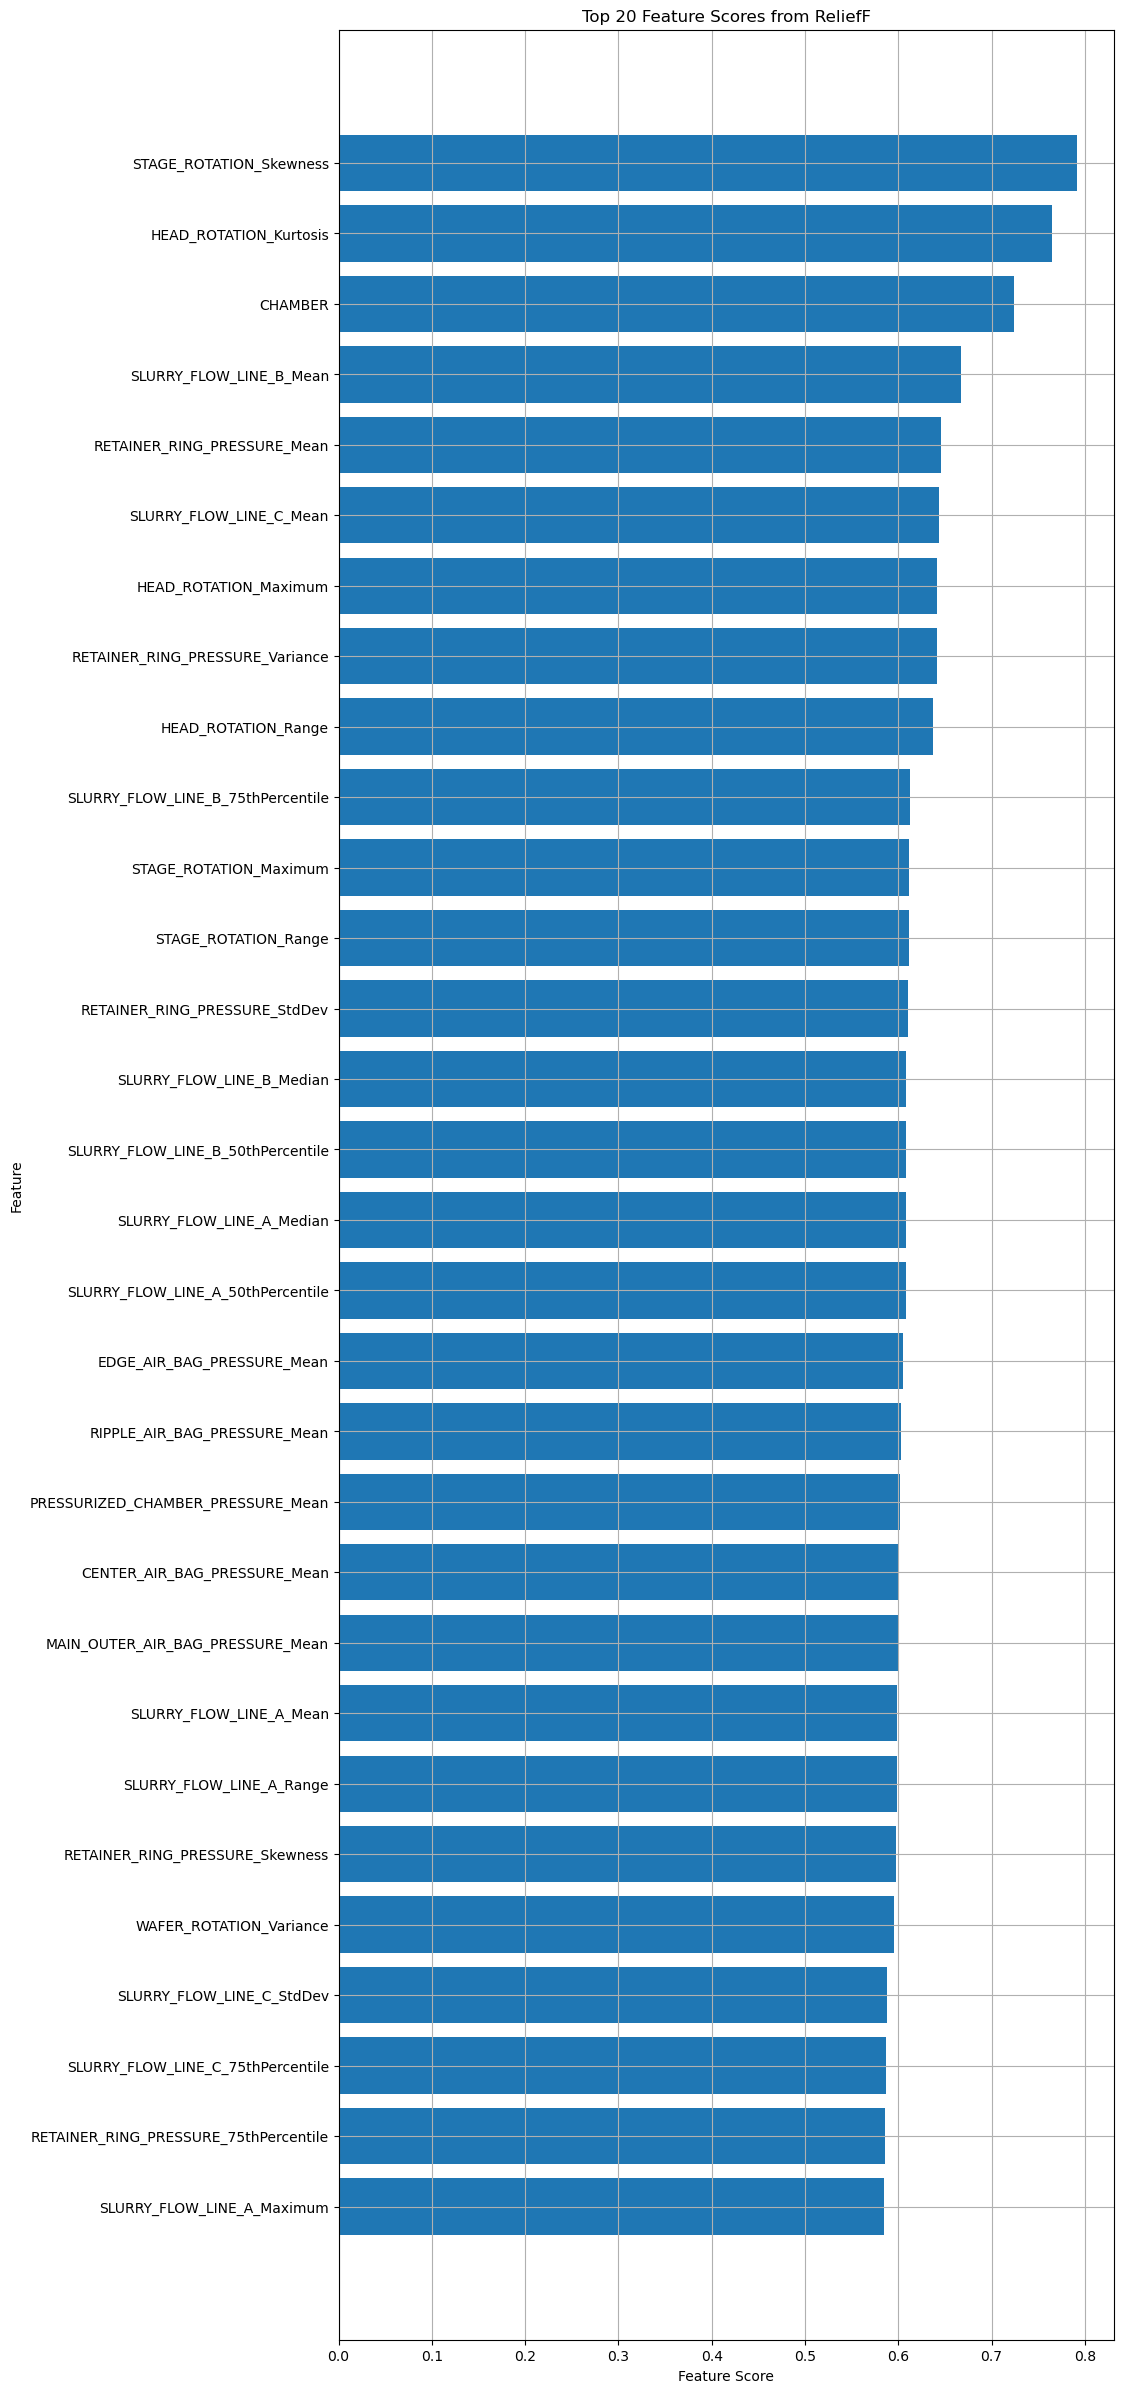

In [34]:
from skrebate import ReliefF
from sklearn.model_selection import train_test_split

X = training_set.drop(columns=['WAFER_ID', 'AVG_REMOVAL_RATE']).values
y = training_set['AVG_REMOVAL_RATE'].values

# It's a good practice to use a train/test split to avoid overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y)

fs = ReliefF(n_neighbors=30)
fs.fit(X_train, y_train)

feature_scores_dict = {feature_name: feature_score for feature_name, feature_score in zip(training_set.drop(columns=['WAFER_ID', 'AVG_REMOVAL_RATE']).columns, fs.feature_importances_)}

# Sort the dictionary by values (feature scores) in descending order
sorted_features = sorted(feature_scores_dict.items(), key=lambda item: item[1], reverse=True)

# Extract the sorted feature names and scores
sorted_feature_names = [feature[0] for feature in sorted_features]
sorted_feature_scores = [feature[1] for feature in sorted_features]

# Plot
plt.figure(figsize=(10, 30))
plt.barh(sorted_feature_names[:30], sorted_feature_scores[:30])
plt.xlabel('Feature Score')
plt.ylabel('Feature')
plt.title('Top 20 Feature Scores from ReliefF')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score on top
plt.grid()
plt.show()

In [35]:
from itertools import zip_longest

print("Features from RF\t\t\t\tFeature from ReliefF")
print("--------------------------------------------------------------")

for item1, item2 in zip_longest(feature_importances_df['Feature'][:30], sorted_feature_names[:30], fillvalue=""):
    print(f"{item1.ljust(30)}\t\t\t\t {item2}")


Features from RF				Feature from ReliefF
--------------------------------------------------------------
HEAD_ROTATION_Variance        				 STAGE_ROTATION_Skewness
HEAD_ROTATION_StdDev          				 HEAD_ROTATION_Kurtosis
CHAMBER                       				 CHAMBER
USAGE_OF_BACKING_FILM_Maximum 				 SLURRY_FLOW_LINE_B_Mean
HEAD_ROTATION_50thPercentile  				 RETAINER_RING_PRESSURE_Mean
DRESSING_WATER_STATUS_Skewness				 SLURRY_FLOW_LINE_C_Mean
USAGE_OF_MEMBRANE_Maximum     				 HEAD_ROTATION_Maximum
USAGE_OF_PRESSURIZED_SHEET_Maximum				 RETAINER_RING_PRESSURE_Variance
USAGE_OF_BACKING_FILM_Mean    				 HEAD_ROTATION_Range
WAFER_ROTATION_Skewness       				 SLURRY_FLOW_LINE_B_75thPercentile
HEAD_ROTATION_Mean            				 STAGE_ROTATION_Maximum
STAGE_ROTATION_Skewness       				 STAGE_ROTATION_Range
HEAD_ROTATION_Kurtosis        				 RETAINER_RING_PRESSURE_StdDev
HEAD_ROTATION_Median          				 SLURRY_FLOW_LINE_B_Median
USAGE_OF_MEMBRANE_Mean        				 SLURRY_FLOW_LINE_B_50thPerce

In [37]:
set1 = set(feature_importances_df['Feature'].values[:40])
set2 = set(sorted_feature_names[:40])

commmon = set1.intersection(set2)
print(commmon)

{'STAGE_ROTATION_Skewness', 'CHAMBER', 'HEAD_ROTATION_Kurtosis', 'HEAD_ROTATION_StdDev', 'WAFER_ROTATION_Variance', 'HEAD_ROTATION_Maximum', 'SLURRY_FLOW_LINE_A_Mean'}
